## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Look at HallOfFame table

In [2]:
hof = pd.read_csv("HallOfFame.csv")
hof.shape

(4191, 9)

### 1.1 Remain the data with category of Player

In [3]:
hof_player = hof[hof['category']=='Player']
hof_player.shape

(4066, 9)

### 1.2 Find out the ways players were elected to the Hall of Fame

In [4]:
hof_player.votedBy.value_counts()

BBWAA               3698
Veterans             142
Run Off               81
Nominating Vote       76
Old Timers            25
Final Ballot          21
Negro League          21
Special Election       2
Name: votedBy, dtype: int64

In [5]:
hof_player[hof_player['inducted']=='Y'].votedBy.value_counts()

BBWAA               123
Veterans             82
Old Timers           25
Negro League         21
Run Off               3
Special Election      2
Name: votedBy, dtype: int64

In [6]:
hof_player[hof_player['inducted']=='Y'].shape

(256, 9)

### 1.3 Find out the number of players with the times when they were elected to the Hall of Fame

In [7]:
inducted_name = list(hof_player[hof_player['inducted']=='Y'].playerID)
inducted_name[:5]

['cobbty01', 'ruthba01', 'wagneho01', 'mathech01', 'johnswa01']

In [8]:
times_player = hof_player.copy()
times_player['inductedName'] = hof_player['playerID'].apply(lambda x: x in inducted_name)
times_player = times_player[times_player['inductedName']]
times_player.shape

(1574, 10)

In [9]:
times_player.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,inductedName
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,True
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,True
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,True
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,True
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN,True


In [10]:
electedTimes = times_player.groupby('playerID').size().to_frame()
electedTimes.columns=['times']

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


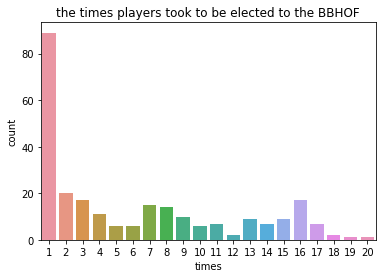

In [11]:
f, ax = plt.subplots()
ax.set_title("the times players took to be elected to the BBHOF")
sns.countplot(data=electedTimes,x='times')
plt.show()

## 2. People table and calculate new features

- servingDays = finalGame - debut
- debutAge = debut - birthYear

In [12]:
# calculte servingDays and debutAge
player = pd.read_csv("People.csv",parse_dates=["debut","finalGame","birthYear"])
player['servingDays']=(player["finalGame"] - player["debut"]).apply(lambda x: x.days)
player['debutAge']=(player["debut"] - player["birthYear"]).apply(lambda x: x.days/365)
player.shape

(19370, 26)

### 2.1 Delete players whose finalGame are after 2012,
which means they can not be able to be elected now.

In [13]:
player = player[player['debut'].apply(lambda x: x.year>=1942)]
player.shape

(11881, 26)

In [14]:
player = player[player['finalGame'].apply(lambda x: x.year<=2012)]
player.shape

(9468, 26)

## 3. Merge People table and HallOfFame table

In [15]:
player = player.join(hof_player[hof_player.inducted == "Y"][["playerID","inducted"]].set_index("playerID"),\
                     on="playerID")
player.inducted.fillna("N",inplace=True)
player.shape

(9468, 27)

### 3.1 Look at the distribution of weight, hight, servingDays and debutAge with players being inducted or not

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


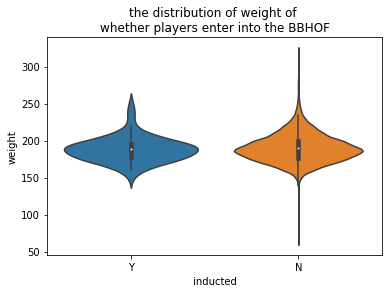

In [16]:
f, ax = plt.subplots()
ax.set_title("the distribution of weight of \nwhether players enter into the BBHOF")
sns.violinplot(y='weight',x='inducted',data=player)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


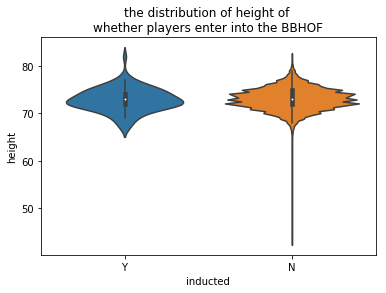

In [17]:
f, ax = plt.subplots()
ax.set_title("the distribution of height of \nwhether players enter into the BBHOF")
sns.violinplot(y='height',x='inducted',data=player)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


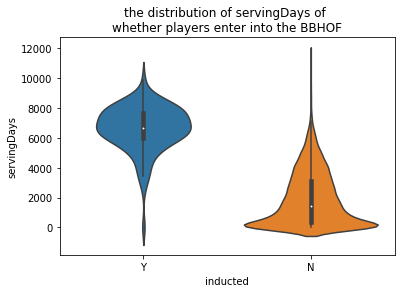

In [18]:
f, ax = plt.subplots()
ax.set_title("the distribution of servingDays of \nwhether players enter into the BBHOF")
sns.violinplot(y='servingDays',x='inducted',data=player)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


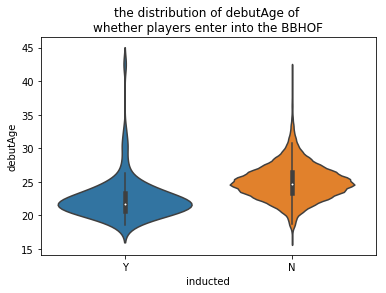

In [19]:
f, ax = plt.subplots()
ax.set_title("the distribution of debutAge of \nwhether players enter into the BBHOF")
sns.violinplot(y='debutAge',x='inducted',data=player)

In [20]:
player.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID', 'servingDays', 'debutAge', 'inducted'],
      dtype='object')

### 3.2 Keep selected features

In [21]:
merged_player = player[['playerID','debut','finalGame','weight','servingDays', 'debutAge', 'inducted']]
merged_player.shape

(9468, 7)

## 4. Batting table and calculate new features
- AB, R, BA (H/AB), G, HR, RBI, SB, SF
- OBP (H+BB+HBP)/(AB+BB+HBP+SF),
- SLG (H+2B+23B+3HR)/AB
- AB/G, R/G, HR/G, RBI/G, SB/G

In [22]:
# calculte servingDays
batting = pd.read_csv("Batting.csv")

In [23]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [24]:
cont_col = ['playerID','G', 'AB', 'R', 'H','2B', '3B', 
            'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 
            'HBP', 'SH', 'SF', 'GIDP']
# aggregate batting table
batting = batting[cont_col].groupby('playerID').sum()

# new features
batting['BA']=batting['H']/batting['AB']
batting['OBP']=(batting['H']+batting['BB']+
                batting['HBP'])/(batting['AB']+
                batting['BB']+batting['HBP']+batting['SF'])
batting['SLF']=(batting['H']+2*batting['2B']+
                    3*batting['3B']+4*batting['HR'])/(batting['AB'])
batting['AB/G'] = batting['AB']/batting['G']
batting['R/G'] = batting['R']/batting['G']
batting['HR/G'] = batting['HR']/batting['G']
batting['SB/G'] = batting['SB']/batting['G']
batting['RBI/G'] = batting['RBI']/batting['G']
batting['IBB/G'] = batting['IBB']/batting['G']
batting['SF/G'] = batting['SF']/batting['G']

In [25]:
batting = batting[batting['AB']>0]
batting.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,...,BA,OBP,SLF,AB/G,R/G,HR/G,SB/G,RBI/G,IBB/G,SF/G
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,331,4,0,0,0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.012085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,...,0.304998,0.373949,0.673973,3.748939,0.659187,0.228927,0.072771,0.696483,0.088842,0.036689
aaronto01,437,944,102,216,42,6,13,94.0,9.0,8.0,...,0.228814,0.291506,0.391949,2.160183,0.233410,0.029748,0.020595,0.215103,0.006865,0.013730
aasedo01,448,5,0,0,0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.011161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abadan01,15,21,1,2,0,0,0,0.0,0.0,1.0,...,0.095238,0.240000,0.095238,1.400000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
batting.columns

Index(['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BA', 'OBP', 'SLF', 'AB/G', 'R/G',
       'HR/G', 'SB/G', 'RBI/G', 'IBB/G', 'SF/G'],
      dtype='object')

In [27]:
batting1 = batting[['G',  'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G', 'RBI/G', 'IBB/G', 'SF/G']]

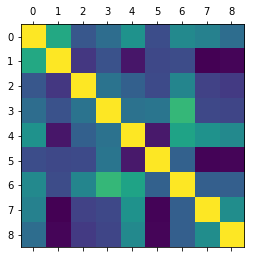

In [28]:
plt.matshow(batting1.corr())

In [29]:
batting1.shape

(17109, 9)

In [30]:
# batting_cate_temp = batting[['playerID','lgID']]
# batting_cate_temp = batting_cate_temp.fillna(-1)

In [31]:
# batting_cate = batting_cate_temp.groupby('playerID').agg(lambda x: x.value_counts().index[0])
# batting_cate.columns

In [32]:
# batting_cate = batting_cate.replace(-1,np.nan)

In [33]:
# batting_group = pd.concat([batting_cont,batting_cate],axis=1)

In [34]:
# batting_group.shape

## 3. Merge Batting table with merged player DataFrame

In [35]:
merged_player2 = batting1.merge(merged_player, on="playerID")

In [36]:
merged_player2.shape

(8118, 16)

## 4. Fielding table
- fielding percentage (FPCT) = (A + PO) / ( A + PO + E)

In [37]:
fielding = pd.read_csv("Fielding.csv")
fielding.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS', 'ZR'],
      dtype='object')

In [38]:
fielding.isnull().sum()

playerID         0
yearID           0
stint            0
teamID           0
lgID          1513
POS              0
G                0
GS           50742
InnOuts      36524
PO               0
A                0
E                1
DP               0
PB          127487
WP          137669
SB          130932
CS          130932
ZR          137669
dtype: int64

In [39]:
fielding['FPCT'] = (fielding['A'] + fielding['PO']) / ( fielding['A'] + fielding['PO'] + fielding['E'])
fielding_con_col = ['playerID','FPCT']

In [40]:
fielding_POS = fielding.loc[fielding['FPCT']>0.950,['POS','FPCT']].groupby('POS').mean()
fielding_POS.T

POS,1B,2B,3B,C,OF,P,SS
FPCT,0.991641,0.985023,0.983807,0.987028,0.986373,0.992358,0.980575


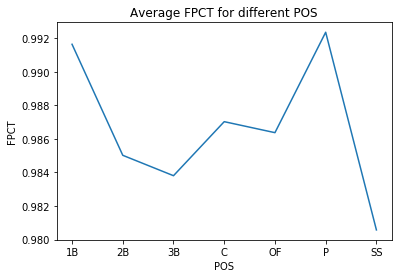

In [41]:
POS_list = list(fielding_POS.index)
x = list(range(len(POS_list)))
y = list(fielding_POS.FPCT)
plt.plot(x,y)
plt.xticks(x, POS_list)
plt.title("Average FPCT for different POS")
plt.xlabel("POS")
plt.ylabel("FPCT")
plt.show()

In [42]:
fielding_cate = fielding[['playerID','POS']].groupby('playerID').agg(lambda x: x.value_counts().index[0])
fielding_cate.head()

,POS
playerID,
aardsda01,P
aaronha01,OF
aaronto01,1B
aasedo01,P
abadan01,1B


In [43]:
fielding1 = fielding.merge(fielding_cate,on='playerID')
fielding2 = fielding1[fielding1['POS_x']==fielding1['POS_y']]
fielding2.head()

,playerID,yearID,stint,teamID,lgID,POS_x,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,FPCT,POS_y
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN,0.666667,SS
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN,0.767956,2B
3,addybo01,1873,1,PH2,NaN,2B,10,NaN,249.0,24,23,8.0,2,NaN,NaN,NaN,NaN,NaN,0.854545,2B
5,addybo01,1874,1,HR1,NaN,2B,45,45.0,1197.0,125,139,48.0,7,NaN,NaN,NaN,NaN,NaN,0.846154,2B
8,addybo01,1875,1,PH2,NaN,2B,2,NaN,48.0,3,7,3.0,0,NaN,NaN,NaN,NaN,NaN,0.769231,2B


In [44]:
fielding_cont = fielding2[['playerID','FPCT']].groupby('playerID').mean()
fielding_cont.head()

,FPCT
playerID,
aardsda01,0.884354
aaronha01,0.979124
aaronto01,0.982705
aasedo01,0.955399
abadan01,0.986486


In [45]:
fielding_group = pd.concat([fielding_cont,fielding_cate],axis=1)
# filter playres whoes FPCT is null
fielding_group.dropna(axis=0,how='any',inplace=True)

In [46]:
fielding_group.shape

(18171, 2)

## 5. Merge Fielding table

In [47]:
merged_player3 = fielding_group.merge(merged_player2, on="playerID")
merged_player3.shape

(7927, 18)

In [48]:
merged_player3.inducted.value_counts()

N    7830
Y      97
Name: inducted, dtype: int64

In [49]:
97/7829

0.012389832673393792

In [50]:
merged_player3.columns

Index(['playerID', 'FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'debut', 'finalGame', 'weight', 'servingDays',
       'debutAge', 'inducted'],
      dtype='object')

In [51]:
merged_player3.to_csv("merged_players42-12.csv")